#### Import libraries

In [ ]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, train_test_split

from skopt import dummy_minimize
from skopt.plots import plot_convergence
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args

In [ ]:
breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y = True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1, 1:0})

X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Define the hyperparameter space

In [ ]:
Integer(10, 120, name='n_estimators')

Integer(low=10, high=120, prior='uniform', transform='identity')

In [ ]:
Real(0, 1, name='min_samples_split')

Real(low=0, high=1, prior='uniform', transform='identity')

In [ ]:
Categorical(['deviance', 'exponential'], name='loss')

Categorical(categories=('deviance', 'exponential'), prior=None)

In [ ]:
param_grid = [
              Integer(10, 120, name='n_estimators'),
              Real(0, 0.999, name='min_samples_split'),
              Integer(1,5, name='max_depth'),
              Categorical(['deviance', 'exponential'], name='loss')
              ]

#### Define the model

In [ ]:
gbm = GradientBoostingClassifier(random_state=0)

#### Define the objective function

In [ ]:
@use_named_args(param_grid)
def objective(**params):
  gbm.set_params(**params)
  value = np.mean(
      cross_val_score(
          gbm,
          X_train,
          y_train,
          cv=3,
          n_jobs=-4,
          scoring='accuracy'
      )
  )

  return -value

#### Randomized Search

In [ ]:
search = dummy_minimize(
    objective,
    param_grid,
    n_calls=50,
    random_state=42
)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
 

In [ ]:
"Best score=%.4f" % search.fun

'Best score=-0.9673'

In [ ]:
print(""""Best parameters:
=========================
- n_estimators=%d
- min_samples_split=%.6f
- max_depth=%d
- loss=%s""" % (search.x[0],
                search.x[1],
                search.x[2],
                search.x[3]))

"Best parameters:
- n_estimators=80
- min_samples_split=0.422978
- max_depth=1
- loss=deviance


#### Evaluate convergence of the search

<Axes: title={'center': 'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

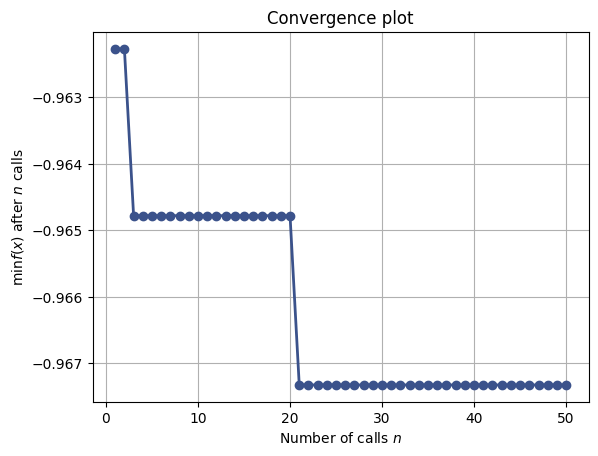

In [ ]:
plot_convergence(search)